# Text deskewing

Solution found here: [Text skew correction with OpenCV and Python](https://www.pyimagesearch.com/2017/02/20/text-skew-correction-opencv-python/)

In [ ]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import timeit
import os

from matplotlib import pyplot as plt

In [ ]:
def deskew(path):
    # load the image from disk
    image = cv2.imread(path)

    # convert the image to grayscale and flip the foreground
    # and background to ensure foreground is now "white" and
    # the background is "black"
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    # threshold the image, setting all foreground pixels to
    # 255 and all background pixels to 0
    thresh = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # grab the (x, y) coordinates of all pixel values that
    # are greater than zero, then use these coordinates to
    # compute a rotated bounding box that contains all
    # coordinates
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    # the `cv2.minAreaRect` function returns values in the
    # range [-90, 0); as the rectangle rotates clockwise the
    # returned angle trends to 0 -- in this special case we
    # need to add 90 degrees to the angle
    if angle < -45:
        angle = -(90 + angle)
    # otherwise, just take the inverse of the angle to make
    # it positive
    else:
        angle = -angle

    # rotate the image to deskew it
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),
        flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    # draw the correction angle on the image so we can validate it
    cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
        (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    # show the output image
    print(f"[INFO] path: {path} angle: {angle:.3f}")

    #Show the image with matplotlib
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
    
    ax1.imshow(image)
    ax2.imshow(rotated)
    plt.show()

    # return rotated

[INFO] path: data/pos_82.png angle: -81.959


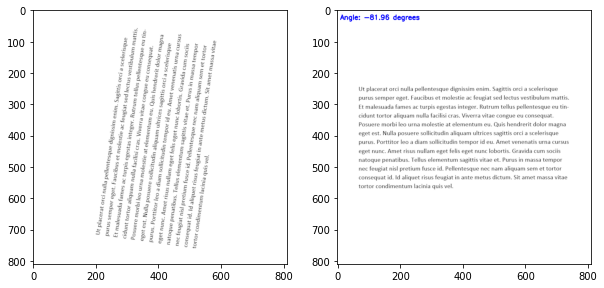

In [ ]:
deskew("data/pos_82.png")

[INFO] path: data/pos_45.png angle: -45.000


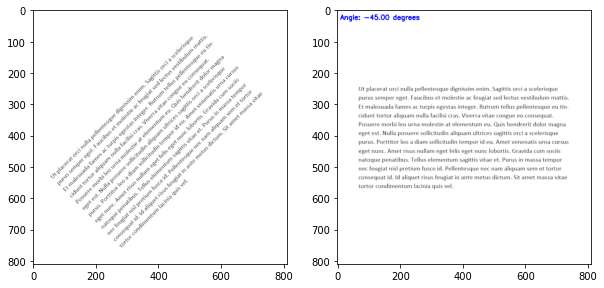

[INFO] path: data/pos_82.png angle: -81.959


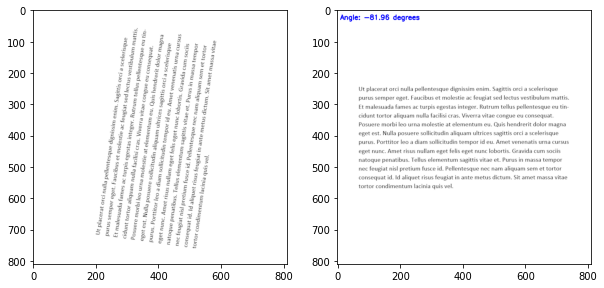

[INFO] path: data/diamond.png angle: -34.778


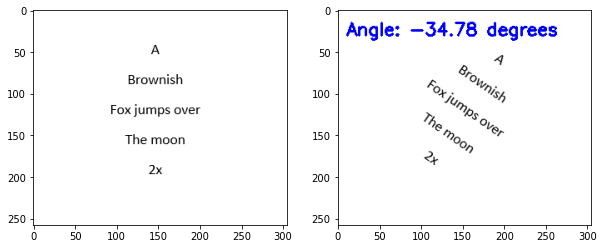

[INFO] path: data/neg_180.png angle: -90.000


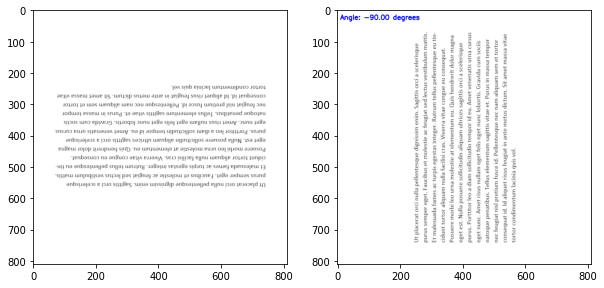

[INFO] path: data/neg_120.png angle: -59.924


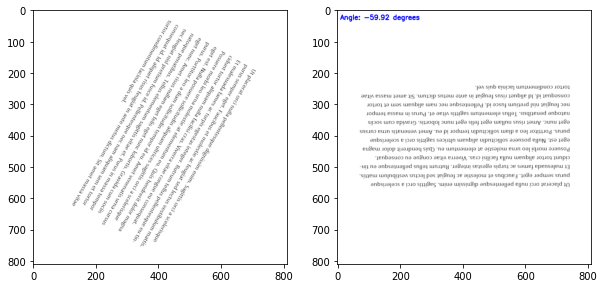

[INFO] path: data/pos_0.png angle: -0.000


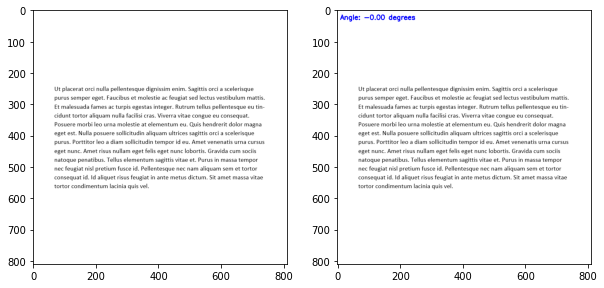

[INFO] path: data/neg_16.png angle: -73.947


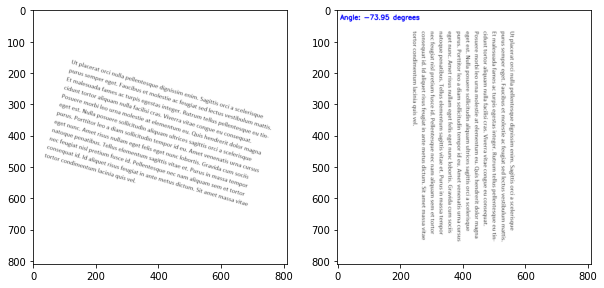

[INFO] path: data/pos_8.png angle: -7.954


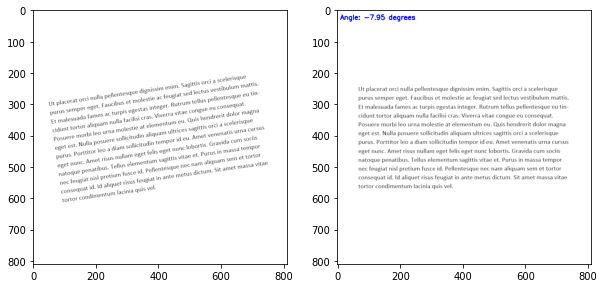

[INFO] path: data/neg_90.png angle: -90.000


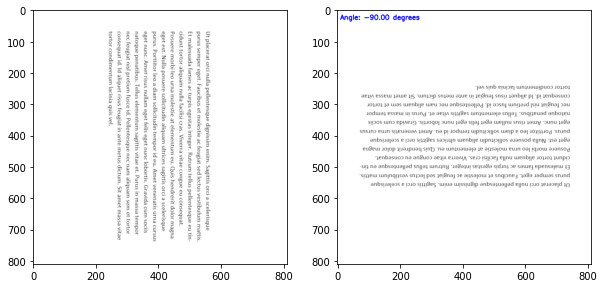

[INFO] path: data/pos_120.png angle: -30.018


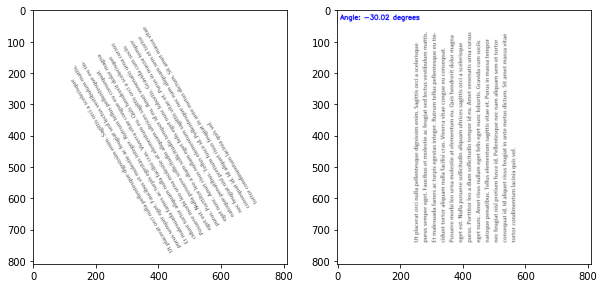

[INFO] path: data/pos_90.png angle: -0.000


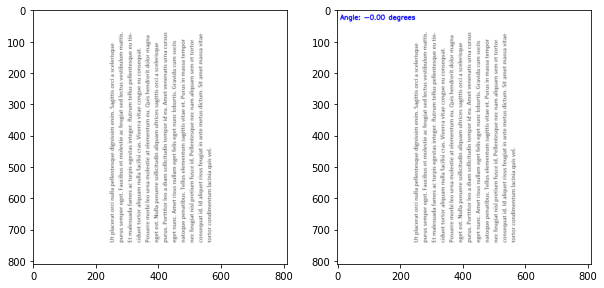

In [ ]:
for path in os.listdir("data/"):
    deskew("data/" + path)

In [ ]:
timeit.timeit('deskew("data/neg_16.png")', number=100, globals=globals())

[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png angle: -73.947
[INFO] path: data/neg_16.png ang

5.383579610002926

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87989bd7-7a25-4e61-b3c0-cb24ea7ca1f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>